In [ ]:
# ###################################
# Group ID: 222
# Members: Adrián Gómez Repollés, Kresten Johansen, Misbah Unnisa, Mohammadali Zakeriharandi
# Date: 18/06/2024
# Lecture: 3a Parametric methods
# Dependencies: Numpy, Scipy and Matplotlib.
# Python version: 3.12.2
# Functionality: Jupyter notebook to classify categories using probability calculations
# ###################################

## Day 1 - Exercise

### Download "dataset1_G_noisy.mat" (filename under the folder "Data and code" above) or its ASCII version "dataset1_G_noisy_ASCII.zip", which is generated from handwritten digits database, and do the following exercise (using any program language you like, e.g., Python, Matlab):

In [2]:
## Imports
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as norm

### You are given, as the train data, trn_x and trn_y along with their class labels trn_x_class and trn_y_class. The task is to classify the following TEST data.

In [7]:
## Load data
dataset1 = sio.loadmat('Data/dataset1_G_noisy.mat')

In [8]:
## Split data

# Train data
trn_x = dataset1['trn_x']
trn_y = dataset1['trn_y']
trn_x_class = dataset1['trn_x_class']
trn_y_class = dataset1['trn_y_class']

# Test data
tst_xy = dataset1['tst_xy']
tst_xy_class = dataset1['tst_xy_class']
tst_xy_126 = dataset1['tst_xy_126']
tst_xy_126_class = dataset1['tst_xy_126_class']

# Correct classes
trn_x_class = np.array([i[0] for i in trn_x_class])
trn_y_class = np.array([i[0] for i in trn_y_class])
tst_xy_class = np.array([i[0] for i in tst_xy_class])
tst_xy_126_class = np.array([i[0] for i in tst_xy_126_class])


**Visualize data**

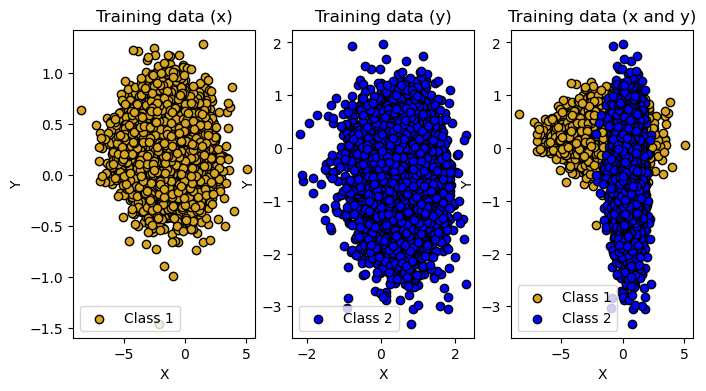

In [9]:
# Plot
fig, ax = plt.subplots(1,3, figsize=(8,4))

# Trn_x
ax[0].scatter(trn_x[:,0], trn_x[:,1], color="goldenrod", edgecolor="black", label="Class 1")
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Training data (x)')
ax[0].legend()

# Trn_y
ax[1].scatter(trn_y[:,0], trn_y[:,1], color="blue", edgecolor="black", label="Class 2")
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_title('Training data (y)')
ax[1].legend()

# Tnr_x and Trn_y
ax[2].scatter(trn_x[:,0], trn_x[:,1], color="goldenrod", edgecolor="black", label="Class 1")
ax[2].scatter(trn_y[:,0], trn_y[:,1], color="blue", edgecolor="black", label="Class 2")
ax[2].set_xlabel('X')
ax[2].set_ylabel('Y')
ax[2].set_title('Training data (x and y)')
ax[2].legend()

### (a) classify instances in tst_xy, and use the corresponding label file tst_xy_class to calculate the accuracy.

In [10]:
# Compute prior distributions
ppx = trn_x.shape[0] / (trn_x.shape[0] + trn_y.shape[0])
ppy = trn_y.shape[0] / (trn_y.shape[0] + trn_x.shape[0])

In [11]:
## Compute parameters

# Means
mean_x = np.mean(trn_x, axis=0)
mean_y = np.mean(trn_y, axis=0)

# Covariances
cov_x = np.cov(trn_x.T)
cov_y = np.cov(trn_y.T)

# Multivariate Gaussian
l_x = norm(mean = mean_x, cov = cov_x)
l_y = norm(mean = mean_y, cov = cov_y)


Covariance matrix:

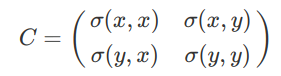

In [12]:
# Posterior probabilities
postprob = np.array([ppx * l_x.pdf(tst_xy), ppy * l_y.pdf(tst_xy)]).T

In [13]:
# Classification
cls = [1 if i[0] > i[1] else 2 for i in postprob]
total = len(tst_xy)

In [14]:
acc = np.sum([1 for i,j in zip(cls, tst_xy_class) if i == j]) / len(tst_xy_class) * 100
print(f"Accurracy is equal to {np.round(acc,2)}%")

Accurracy is equal to 90.92%


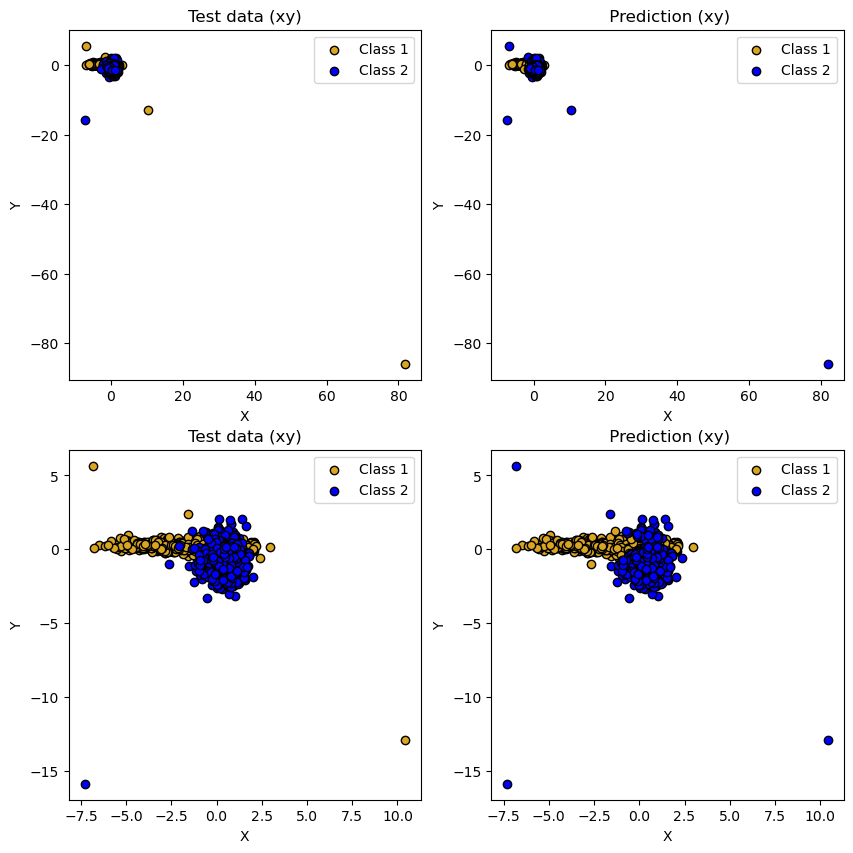

In [79]:
# Plot test data
fig, ax = plt.subplots(2,2, figsize=(10,10))

# Data
tst_xy_1 = np.array([(i[0][0], i[0][1]) for i in zip(tst_xy, tst_xy_class) if i[1] == 1])
tst_xy_2 = np.array([(i[0][0], i[0][1]) for i in zip(tst_xy, tst_xy_class) if i[1] == 2])
pred_xy_1 = np.array([(i[0][0], i[0][1]) for i in zip(tst_xy, cls) if i[1] == 1])
pred_xy_2 = np.array([(i[0][0], i[0][1]) for i in zip(tst_xy, cls) if i[1] == 2])

# Remove outlier
tst_xy_1_filt = tst_xy_1[tst_xy_1[:,0] < 80,:]
tst_xy_2_filt = tst_xy_2[tst_xy_2[:,0] < 80,:]
pred_xy_1_filt = pred_xy_1[pred_xy_1[:,0] < 80,:]
pred_xy_2_filt = pred_xy_2[pred_xy_2[:,0] < 80,:]

# Test data
ax[0][0].scatter(tst_xy_1[:,0], tst_xy_1[:,1], color="goldenrod", edgecolor="black", label="Class 1")
ax[0][0].scatter(tst_xy_2[:,0], tst_xy_2[:,1], color="blue", edgecolor="black", label="Class 2")
ax[0][0].set_xlabel('X')
ax[0][0].set_ylabel('Y')
ax[0][0].set_title('Test data (xy)')
ax[0][0].legend()

# Prediction
ax[0][1].scatter(pred_xy_1[:,0], pred_xy_1[:,1], color="goldenrod", edgecolor="black", label="Class 1")
ax[0][1].scatter(pred_xy_2[:,0], pred_xy_2[:,1], color="blue", edgecolor="black", label="Class 2")
ax[0][1].set_xlabel('X')
ax[0][1].set_ylabel('Y')
ax[0][1].set_title(' Prediction (xy)')
ax[0][1].legend()

# Test data
ax[1][0].scatter(tst_xy_1_filt[:,0], tst_xy_1_filt[:,1], color="goldenrod", edgecolor="black", label="Class 1")
ax[1][0].scatter(tst_xy_2_filt[:,0], tst_xy_2_filt[:,1], color="blue", edgecolor="black", label="Class 2")
ax[1][0].set_xlabel('X')
ax[1][0].set_ylabel('Y')
ax[1][0].set_title('Test data (xy)')
ax[1][0].legend()

# Prediction
ax[1][1].scatter(pred_xy_1_filt[:,0], pred_xy_1_filt[:,1], color="goldenrod", edgecolor="black", label="Class 1")
ax[1][1].scatter(pred_xy_2_filt[:,0], pred_xy_2_filt[:,1], color="blue", edgecolor="black", label="Class 2")
ax[1][1].set_xlabel('X')
ax[1][1].set_ylabel('Y')
ax[1][1].set_title(' Prediction (xy)')
ax[1][1].legend()

**(b) classify instances in tst_xy_126 by assuming a uniform prior over the space of hypotheses, and use the corresponding label file tst_xy_126_class to calculate the accuracy.**

In [80]:
# Prior probabilities
ppx = 0.5
ppx = 0.5

I assume a uniform prior which means that I have the same probability for each category. Since there are two categories, I asume 50% chance for each one (or 0.5 out of 1)

In [81]:
# Posterior probabilities
postprob = np.array([ppx * l_x.pdf(tst_xy_126), ppy * l_y.pdf(tst_xy_126)]).T

In [82]:
# Classification
cls = [1 if i[0] > i[1] else 2 for i in postprob]
total = len(tst_xy_126)

In [83]:
acc = np.sum([1 for i,j in zip(cls, tst_xy_126_class) if i == j]) / len(tst_xy_126_class) * 100
print(f"Accurracy is equal to {np.round(acc,2)}%")

Accurracy is equal to 90.88%


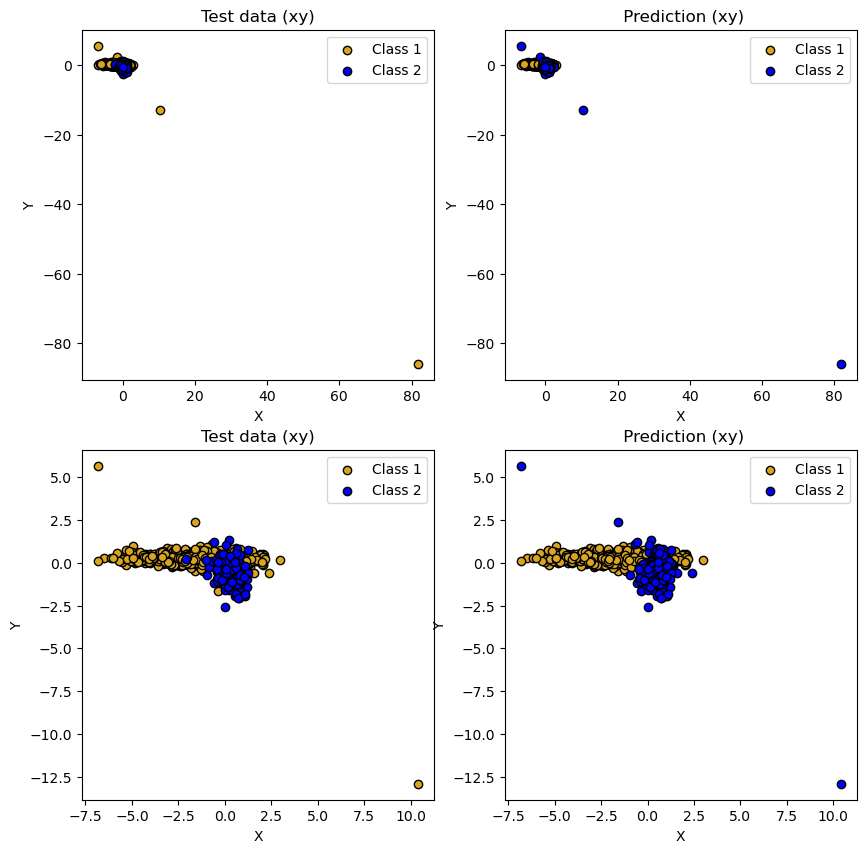

In [84]:
# Plot test data
fig, ax = plt.subplots(2,2, figsize=(10,10))

# Data
tst_xy_126_1 = np.array([(i[0][0], i[0][1]) for i in zip(tst_xy_126, tst_xy_126_class) if i[1] == 1])
tst_xy_126_2 = np.array([(i[0][0], i[0][1]) for i in zip(tst_xy_126, tst_xy_126_class) if i[1] == 2])
pred_xy_126_1 = np.array([(i[0][0], i[0][1]) for i in zip(tst_xy_126, cls) if i[1] == 1])
pred_xy_126_2 = np.array([(i[0][0], i[0][1]) for i in zip(tst_xy_126, cls) if i[1] == 2])

# Remove outlier
tst_xy_126_1_filt = tst_xy_126_1[tst_xy_126_1[:,0] < 80,:]
tst_xy_126_2_filt = tst_xy_126_2[tst_xy_126_2[:,0] < 80,:]
pred_xy_126_1_filt = pred_xy_126_1[pred_xy_126_1[:,0] < 80,:]
pred_xy_126_2_filt = pred_xy_126_2[pred_xy_126_2[:,0] < 80,:]

# Test data
ax[0][0].scatter(tst_xy_126_1[:,0], tst_xy_126_1[:,1], color="goldenrod", edgecolor="black", label="Class 1")
ax[0][0].scatter(tst_xy_126_2[:,0], tst_xy_126_2[:,1], color="blue", edgecolor="black", label="Class 2")
ax[0][0].set_xlabel('X')
ax[0][0].set_ylabel('Y')
ax[0][0].set_title('Test data (xy)')
ax[0][0].legend()

# Prediction
ax[0][1].scatter(pred_xy_126_1[:,0], pred_xy_126_1[:,1], color="goldenrod", edgecolor="black", label="Class 1")
ax[0][1].scatter(pred_xy_126_2[:,0], pred_xy_126_2[:,1], color="blue", edgecolor="black", label="Class 2")
ax[0][1].set_xlabel('X')
ax[0][1].set_ylabel('Y')
ax[0][1].set_title(' Prediction (xy)')
ax[0][1].legend()

# Test data
ax[1][0].scatter(tst_xy_126_1_filt[:,0], tst_xy_126_1_filt[:,1], color="goldenrod", edgecolor="black", label="Class 1")
ax[1][0].scatter(tst_xy_126_2_filt[:,0], tst_xy_126_2_filt[:,1], color="blue", edgecolor="black", label="Class 2")
ax[1][0].set_xlabel('X')
ax[1][0].set_ylabel('Y')
ax[1][0].set_title('Test data (xy)')
ax[1][0].legend()

# Prediction
ax[1][1].scatter(pred_xy_126_1_filt[:,0], pred_xy_126_1_filt[:,1], color="goldenrod", edgecolor="black", label="Class 1")
ax[1][1].scatter(pred_xy_126_2_filt[:,0], pred_xy_126_2_filt[:,1], color="blue", edgecolor="black", label="Class 2")
ax[1][1].set_xlabel('X')
ax[1][1].set_ylabel('Y')
ax[1][1].set_title(' Prediction (xy)')
ax[1][1].legend()

**(c) Classify instances in tst_xy_126 by assuming a prior probability of 0.9 for Class x and 0.1 for Class y, and use the corresponding label file tst_xy_126_class to calculate the accuracy; compare the results with those of (b).**

In [85]:
# Prior probabilities
ppx = 0.9
ppy = 0.1

In [86]:
# Posterior probabilities
postprob = np.array([ppx * l_x.pdf(tst_xy_126), ppy * l_y.pdf(tst_xy_126)]).T

In [87]:
# Classification
cls = [1 if i[0] > i[1] else 2 for i in postprob]
total = len(tst_xy_126)

In [88]:
# Compute accuracy
acc = np.sum([1 for i,j in zip(cls, tst_xy_126_class) if i == j]) / len(tst_xy_126_class) * 100
print(f"Accurracy is equal to {np.round(acc,2)}%")

Accurracy is equal to 96.27%


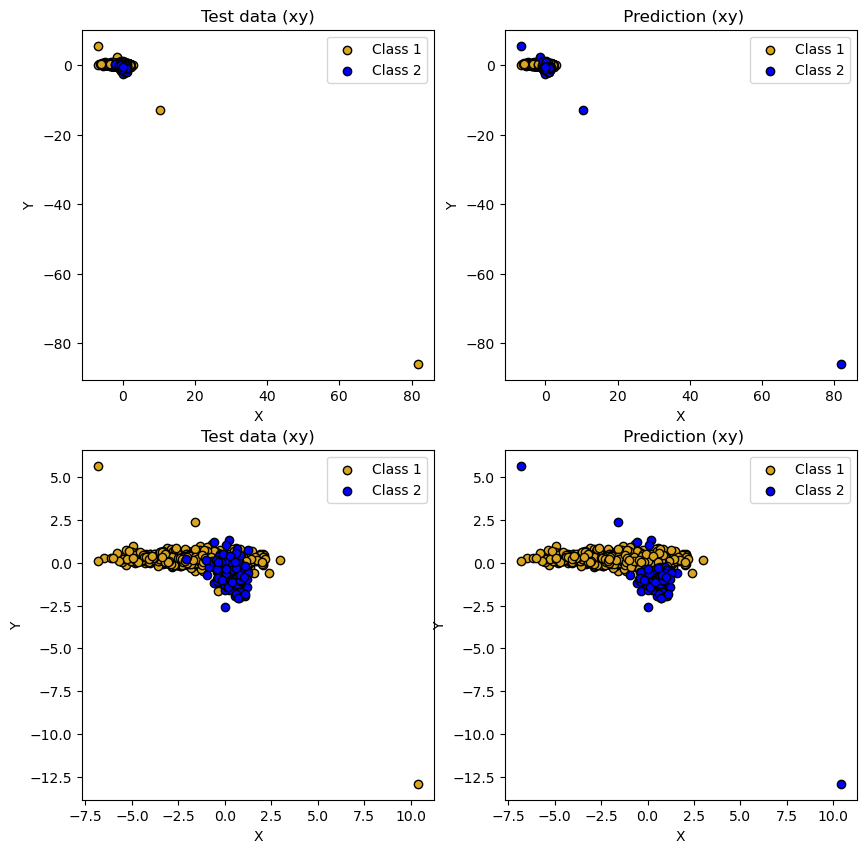

In [89]:
# Plot test data
fig, ax = plt.subplots(2,2, figsize=(10,10))

# Data
tst_xy_126_1 = np.array([(i[0][0], i[0][1]) for i in zip(tst_xy_126, tst_xy_126_class) if i[1] == 1])
tst_xy_126_2 = np.array([(i[0][0], i[0][1]) for i in zip(tst_xy_126, tst_xy_126_class) if i[1] == 2])
pred_xy_126_1 = np.array([(i[0][0], i[0][1]) for i in zip(tst_xy_126, cls) if i[1] == 1])
pred_xy_126_2 = np.array([(i[0][0], i[0][1]) for i in zip(tst_xy_126, cls) if i[1] == 2])

# Remove outlier
tst_xy_126_1_filt = tst_xy_126_1[tst_xy_126_1[:,0] < 80,:]
tst_xy_126_2_filt = tst_xy_126_2[tst_xy_126_2[:,0] < 80,:]
pred_xy_126_1_filt = pred_xy_126_1[pred_xy_126_1[:,0] < 80,:]
pred_xy_126_2_filt = pred_xy_126_2[pred_xy_126_2[:,0] < 80,:]

# Test data
ax[0][0].scatter(tst_xy_126_1[:,0], tst_xy_126_1[:,1], color="goldenrod", edgecolor="black", label="Class 1")
ax[0][0].scatter(tst_xy_126_2[:,0], tst_xy_126_2[:,1], color="blue", edgecolor="black", label="Class 2")
ax[0][0].set_xlabel('X')
ax[0][0].set_ylabel('Y')
ax[0][0].set_title('Test data (xy)')
ax[0][0].legend()

# Prediction
ax[0][1].scatter(pred_xy_126_1[:,0], pred_xy_126_1[:,1], color="goldenrod", edgecolor="black", label="Class 1")
ax[0][1].scatter(pred_xy_126_2[:,0], pred_xy_126_2[:,1], color="blue", edgecolor="black", label="Class 2")
ax[0][1].set_xlabel('X')
ax[0][1].set_ylabel('Y')
ax[0][1].set_title(' Prediction (xy)')
ax[0][1].legend()

# Test data
ax[1][0].scatter(tst_xy_126_1_filt[:,0], tst_xy_126_1_filt[:,1], color="goldenrod", edgecolor="black", label="Class 1")
ax[1][0].scatter(tst_xy_126_2_filt[:,0], tst_xy_126_2_filt[:,1], color="blue", edgecolor="black", label="Class 2")
ax[1][0].set_xlabel('X')
ax[1][0].set_ylabel('Y')
ax[1][0].set_title('Test data (xy)')
ax[1][0].legend()

# Prediction
ax[1][1].scatter(pred_xy_126_1_filt[:,0], pred_xy_126_1_filt[:,1], color="goldenrod", edgecolor="black", label="Class 1")
ax[1][1].scatter(pred_xy_126_2_filt[:,0], pred_xy_126_2_filt[:,1], color="blue", edgecolor="black", label="Class 2")
ax[1][1].set_xlabel('X')
ax[1][1].set_ylabel('Y')
ax[1][1].set_title(' Prediction (xy)')
ax[1][1].legend()

**Discussion:**

We obtain accuracies of 90.92, 90.88 and 96.27% for our three classiffications of test data, respectively. In the first one we computed the prior probabilities and apply them to obtain our trained model. In the other two we assume equal (0.5/0.5) and skewed (0.9/0.1) prior probabilities for class 1 and 2, respectively.
The best accuracy was obtained for the third model showing the effect of the prior values on the improvement of the performance. The worst model, slightly worst than the model where we computed the prior probabilities from the data, was the second model where we assume equal prior probabilities.